In [550]:
using CLOUD, JLD2, Plots, LaTeXStrings

In [551]:
path = "../results/h_refinement/"

"../results/h_refinement/"

In [552]:
e_nmc = load_object(string(path,"NodalMulti_Tri_SkewSymmetricMapping_p4/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tri_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mmc = load_object(string(path,"ModalMulti_Tri_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mmu = load_object(string(path,"ModalMulti_Tri_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_ntc = load_object(string(path,"NodalTensor_Tri_SkewSymmetricMapping_p4/central/errors.jld2"))
e_ntu = load_object(string(path,"NodalTensor_Tri_SkewSymmetricMapping_p4/upwind/errors.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tri_SkewSymmetricMapping_p4/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tri_SkewSymmetricMapping_p4/upwind/errors.jld2"));

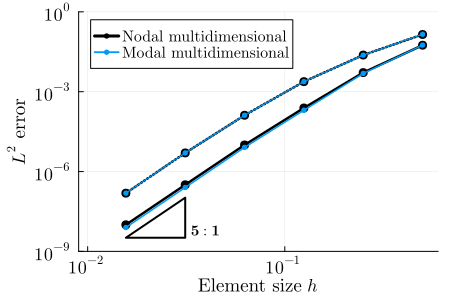

In [553]:
h = [1.0/2^n for n in eachindex(e_nmc)]

plt_m = plot(xaxis=:log10, yaxis=:log10, windowsize=(450,300), legendfontsize=10,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, ylabel="\$L^2\$ error", 
    xlabel="Element size \$h\$", legend=:topleft,  ylims=[1e-9,10e-1], xlims=[0.009,0.6],
    xticks=([0.01, 0.1], [L"10^{-2}", L"10^{-1}"]),
    yticks=([1e-12, 1e-9, 1e-6, 1e-3, 1e0], 
        string.([L"10^{-12}", L"10^{-9}", L"10^{-6}", L"10^{-3}",L"10^{0}"])))

plot!(plt_m, h[1:end], e_nmc[1:end], label="", 
    linewidth=2.5, linestyle=:dot, markershape=:circle, 
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_m, h[1:end],  e_nmu[1:end], label="Nodal multidimensional", 
    linewidth=2.5, linestyle=:solid, markershape=:circle, markersize=5, 
    markerstrokewidth=0.0, color=:black)
plot!(plt_m, h[1:end],  e_mmc[1:end], label="", 
    linewidth=1.5, linestyle=:dot, markershape=:circle, markersize=3, 
    markerstrokewidth=0.0, color=palette(:default)[1])
plot!(plt_m, h[1:end] ,  e_mmu[1:end], label="Modal multidimensional", 
    linewidth=1.5, linestyle=:solid, markershape=:circle, markersize=3,
    markerstrokewidth=0.0, color=palette(:default)[1])
r1 = h[end]
r2 = h[end-1]
plot!(plt_m, [r1, r2, r2, r1], 3.5*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black,  annotations = (0.04, 6.5*r1^5, L"\mathbf{5:1}", 10))

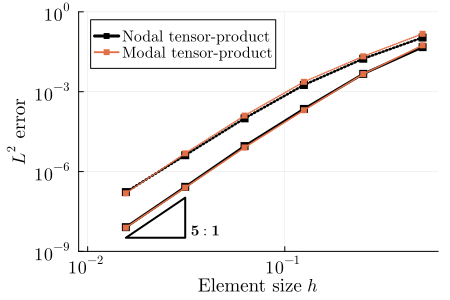

In [554]:
plt_t =plot(xaxis=:log10, yaxis=:log10, windowsize=(450,300), legendfontsize=10,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12,
    ylabel="\$L^2\$ error", xlabel="Element size \$h\$", 
    legend=:topleft,  ylims=[1e-9,10e-1],xlims=[0.009,0.6],
    xticks=([0.01, 0.1], [L"10^{-2}", L"10^{-1}"]),
    yticks=([1e-12, 1e-9, 1e-6, 1e-3, 1e0], 
        string.([L"10^{-12}", L"10^{-9}", L"10^{-6}", L"10^{-3}",L"10^{0}"])))

plot!(plt_t, h[1:end], e_ntc[1:end], label="", 
    linewidth=2.5, linestyle=:dot, markershape=:square, markersize=4, 
    markerstrokewidth=0.0, color=:black)
plot!(plt_t, h[1:end],  e_ntu[1:end], label="Nodal tensor-product", 
    linewidth=2.5, linestyle=:solid, markershape=:square, markersize=4,
    markerstrokewidth=0.0, color=:black)
plot!(plt_t, h[1:end],  e_mtc[1:end], label="", 
    linewidth=1.5, linestyle=:dot, markershape=:square, markersize=3, 
    markerstrokewidth=0.0,markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
plot!(plt_t, h[1:end] ,  e_mtu[1:end], label="Modal tensor-product", 
    linewidth=1.5, linestyle=:solid, markershape=:square, markersize=3, 
    markerstrokewidth=0.0,markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
r1 = h[end]
r2 = h[end-1]
plot!(plt_t, [r1, r2, r2, r1], 3.5*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, color=:black,  annotations = (0.04, 6.5*r1^5, L"\mathbf{5:1}", 10))

In [555]:
savefig(plt_m, "../plots/h_refinement/tri_p4_multi.pdf")
savefig(plt_t, "../plots/h_refinement/tri_p4_tensor.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/h_refinement/tri_p4_tensor.pdf"

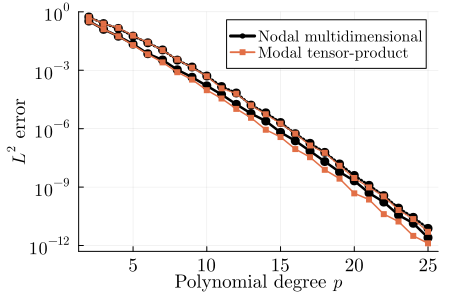

In [556]:
path = "../results/p_refinement/"

p_nm = load_object(string(path,"NodalMulti_Tri_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_nmc = load_object(string(path,"NodalMulti_Tri_SkewSymmetricMapping/central/errors.jld2"))
e_nmu = load_object(string(path,"NodalMulti_Tri_SkewSymmetricMapping/upwind/errors.jld2"))
p_mt = load_object(string(path,"ModalTensor_Tri_SkewSymmetricMapping/central/poly_degrees.jld2"))
e_mtc = load_object(string(path,"ModalTensor_Tri_SkewSymmetricMapping/central/errors.jld2"))
e_mtu = load_object(string(path,"ModalTensor_Tri_SkewSymmetricMapping/upwind/errors.jld2"))

plt_p = plot(yaxis=:log10, windowsize=(450,300), legendfontsize=10,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, ylims=[5e-13,1e0],
    yticks=([1e-12, 1e-9, 1e-6, 1e-3, 1e0], 
        string.([L"10^{-12}", L"10^{-9}", L"10^{-6}", L"10^{-3}",L"10^{0}"])),
    ylabel="\$L^2\$ error", xlabel="Polynomial degree \$p\$")
    
plot!(plt_p, p_nm, e_nmu, label="Nodal multidimensional", 
    linewidth=2.5, linestyle=:solid, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_nm, e_nmc, label=:none, 
    linewidth=2.5, linestyle=:dot, markershape=:circle,
    markersize=5, markerstrokewidth=0.0, color=:black)
plot!(plt_p, p_mt, e_mtu, label="Modal tensor-product", 
    linewidth=1.5, linestyle=:solid, markershape=:square, 
    markersize=3, markerstrokewidth=0.0, 
    markerstrokecolor=palette(:default)[2], color=palette(:default)[2])
plot!(plt_p, p_mt, e_mtc, label=:none, 
    linewidth=1.5, linestyle=:dot, markershape=:square, 
    markersize=3, markerstrokewidth=0.0,
    markerstrokecolor=palette(:default)[2], color=palette(:default)[2])

In [557]:
savefig(plt_p, "../plots/p_refinement/tri_M2.pdf")

"/Users/tristanmontoya/Research/TensorSimplexTests/plots/p_refinement/tri_M2.pdf"